<a href="https://colab.research.google.com/github/tienbuilam/Sentiment-Analysis/blob/main/Module3_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

df = pd.read_csv("./IMDB-Dataset.csv")
df = df.drop_duplicates()
df['review']

,review
0,One of the other reviewers has mentioned that ...
1,A wonderful little production. <br /><br />The...
2,I thought this was a wonderful way to spend ti...
3,Basically there's a family where a little boy ...
4,"Petter Mattei's ""Love in the Time of Money"" is..."
...,...
49995,I thought this movie did a down right good job...
49996,"Bad plot, bad dialogue, bad acting, idiotic di..."
49997,I am a Catholic taught in parochial elementary...
49998,I'm going to have to disagree with the previou...


In [ ]:
!pip install contractions

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.7/110.7 kB 7.3 MB/s eta 0:00:00


In [ ]:
import re
import string
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from bs4 import BeautifulSoup
import contractions

stop = set(stopwords.words('english'))

#Expanding contractions
def expand_contractions(text):
    return contractions.fix(text)

#Function to clean data
def preprocess_text(text):
    wl = WordNetLemmatizer()

    soup = BeautifulSoup(text , "html.parser") # Removing html tags

    text = soup.get_text()
    text = expand_contractions(text) # Expanding chatwords and contracts clearing contractions
    emoji_clean = re.compile ("["
                          u"\U0001F600-\U0001F64F" # emoticons
                          u"\U0001F300-\U0001F5FF" # symbols & pictographs
                          u"\U0001F680-\U0001F6FF" # transport & map symbols
                          u"\U0001F1E0-\U0001F1FF" # flags (iOS)
                          u"\U00002702-\U000027B0"
                          u"\U000024C2-\U0001F251"
                          "]+", flags = re.UNICODE)
    text = emoji_clean.sub(r'', text)
    text = re.sub(r'\.(?=\S)', '. ', text) # Add space after full stop
    text = re.sub(r'http\S+', '', text) # remove url
    text = "".join([
        word.lower() for word in text if word not in string.punctuation
    ]) # remove punctuation and make text lowercase
    text = " ".join([
        wl.lemmatize(word) for word in text.split() if word not in stop and word.isalpha()
    ]) # lemmatize
    return text

df['review'] = df['review'].apply(preprocess_text)
df


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
<ipython-input-16-80772ba5052b>:21: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  soup = BeautifulSoup(text , "html.parser") # Removing html tags


,review,sentiment
0,one reviewer mentioned watching oz episode hoo...,positive
1,wonderful little production filming technique ...,positive
2,thought wonderful way spend time hot summer we...,positive
3,basically family little boy jake think zombie ...,negative
4,petter matteis love time money visually stunni...,positive
...,...,...
49995,thought movie right good job creative original...,positive
49996,bad plot bad dialogue bad acting idiotic direc...,negative
49997,catholic taught parochial elementary school nu...,negative
49998,going disagree previous comment side maltin on...,negative


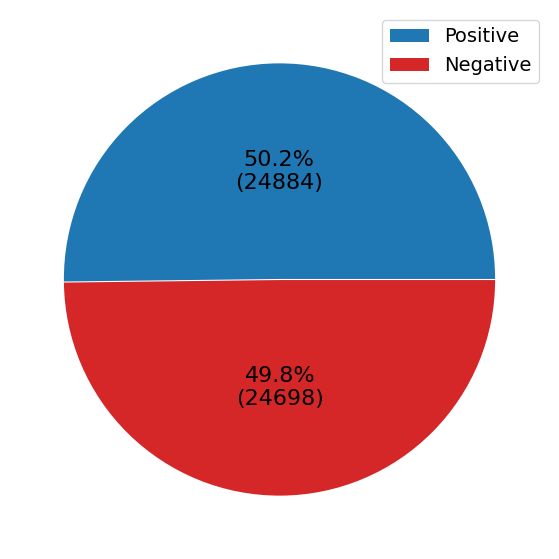

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Creating autocpt arguments
def func(pct, allvalues):
    absolute = int(pct / 100.*np.sum(allvalues))
    return "{:.1f}%\n({:d})".format(pct, absolute)

freq_pos = len(df[df['sentiment'] == 'positive'])
freq_neg = len(df[df['sentiment'] == 'negative'])

data = [freq_pos, freq_neg]

labels = ['positive', 'negative']

# Creating pie charts
pie, ax = plt.subplots(figsize = (11,7))
plt.pie(x=data, autopct=lambda pct: func(pct,data), explode=[0.0025]*2,
        pctdistance=0.5, colors=[sns.color_palette()[0], 'tab:red'], textprops={'fontsize': 16})
labels = [r'Positive', r'Negative']
plt.legend(labels, loc="best", prop={'size': 14})
pie.savefig('pie.png')
plt.show()

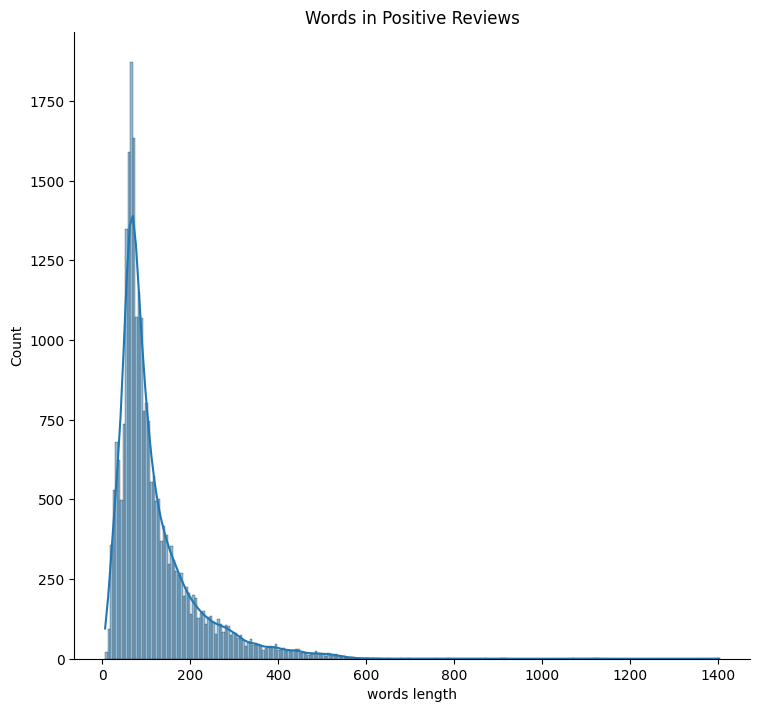

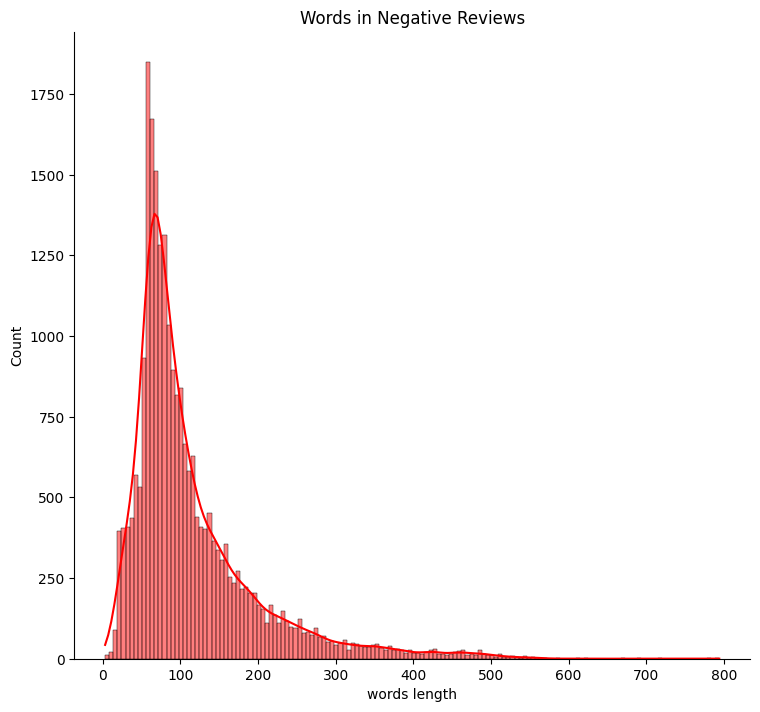

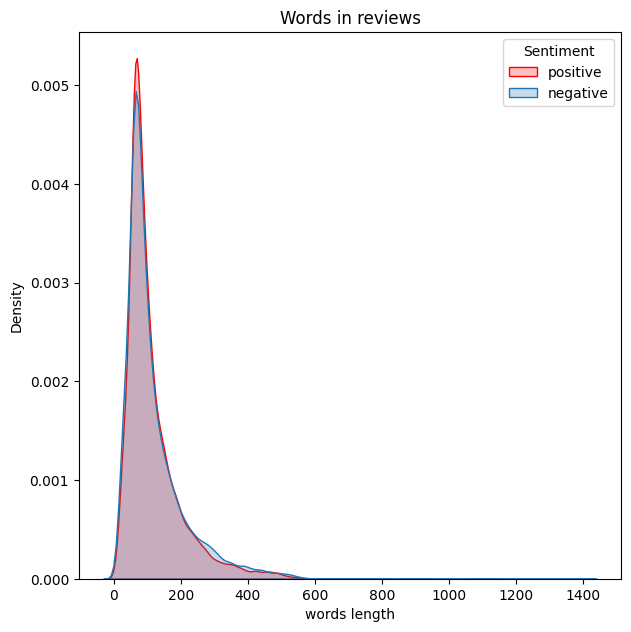

In [ ]:
  words_len = df['review'].str.split().map(lambda x:len(x))
  df_temp = df.copy()
  df_temp['words length'] = words_len

  hist_positive = sns.displot(
      data=df_temp[df_temp['sentiment'] == 'positive'],
      x='words length', hue='sentiment', kde=True, height=7, aspect=1.1, legend=False
  ).set(title='Words in Positive Reviews')
  plt.show(hist_positive)

  hist_negative = sns.displot(
      data=df_temp[df_temp['sentiment'] == 'negative'],
      x='words length', hue='sentiment', kde=True, height=7, aspect=1.1, legend=False, palette=['red']
  ).set(title='Words in Negative Reviews')
  plt.show(hist_negative)

  plt.figure(figsize=(7,7.1))
  kernel_distribution_number_words_plot = sns.kdeplot(
      data=df_temp, x='words length', hue='sentiment', fill=True, palette=[sns.color_palette()[0], 'red']
  ).set(title ='Words in reviews')
  plt.legend(title='Sentiment', labels=['positive', 'negative'])
  plt.show(kernel_distribution_number_words_plot)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder

label_encode = LabelEncoder()
x_data = df['review']
y_data = label_encode.fit_transform(df['sentiment'])

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2, random_state=42)

In [ ]:
Tfidf_vectorizer = TfidfVectorizer(max_features = 10000)
Tfidf_vectorizer.fit(x_train, y_train)

x_train_encoded = Tfidf_vectorizer.transform(x_train)
x_test_encoded = Tfidf_vectorizer.transform(x_test)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

dt_classifier = DecisionTreeClassifier(
    criterion='entropy',
    random_state=42
)
dt_classifier.fit(x_train_encoded, y_train)
y_pred = dt_classifier.predict(x_test_encoded)
accuracy_score(y_test, y_pred)

0.7180598971463145

In [ ]:
rf_classifier = RandomForestClassifier(
    random_state=42
)
rf_classifier.fit(x_train_encoded, y_train)
y_pred = rf_classifier.predict(x_test_encoded)
accuracy_score(y_test, y_pred)

0.8420893415347384